# Quick start2 -Relative-densityratio with multi dimensional samples and optional parameter setting.-

### Generate data

For example,

Generate two samples that follow the 2-dimentional normal distribution of $\mathcal{N(\mu_1,\Sigma_1)}$ and $\mathcal{N(\mu_2,\Sigma_2)}$, respectively, and estimate the relative density ratio
$$r_\alpha (x) = p(x)/(\alpha p(x)+(1-\alpha)q(x)).$$

In [1]:
from src import densityratio
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

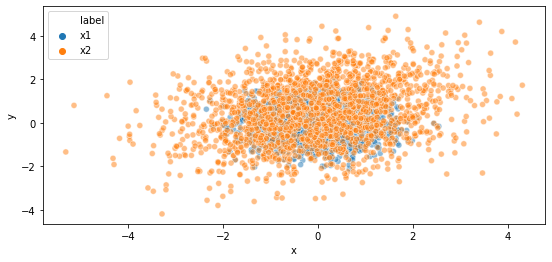

In [2]:
m = [[0.,0.],[0,0.5]]
s = [np.array([[0.5,0],
                [0,0.5]]),
      np.array([[2.0,0.5],
                [0.5,2.0]])]
np.random.seed(10)
x1 = np.random.multivariate_normal(m[0], s[0], size = 2000)
x2 = np.random.multivariate_normal(m[1], s[1], size = 2000)
df = pd.DataFrame({'x':np.r_[x1[:,0],x2[:,0]],'y':np.r_[x1[:,1],x2[:,1]],'label':['x1']*len(x1)+['x2']*len(x2)})

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='x', y='y', alpha=0.5,hue='label',ax=ax)
fig.savefig('pic/QS2_samples.png')

### Estimate relative-densityratio and optional parameters setting

If a value is set for *sigma, lamb*, that value is used, and if a numerical array is set, the *densityratio()* selects the optimum value by CV.   
The *alpha* is a parameter that can adjust the mixing ratio, and is set in the range of \[0,1.\].   
The *kernel_number* is the number of kernels in the linear model.

In [4]:
dens = densityratio.Densratio(x1,x2,sigma=[0.1, 0.3, 0.5, 0.7, 1., 2., 5.], lamb=[0.01, 0.02, 0.03, 0.04, 0.05],kernel_num=200,alpha=0.2)

100%|██████████| 7/7 [00:13<00:00,  1.91s/it, sigma:1.0,lambda:0.02, score:-1.1151]
Found optimal sigma = 1.0, lambda = 0.02, score=-1.1151388156073012


### Compare the true with estimated.

In this case, the true density ratio $r_\alpha(x)$ is known, so we can compare $r_\alpha(x)$ with the estimated density ratio $\hat{r_\alpha}(x)$.    
The code below gives the following output:

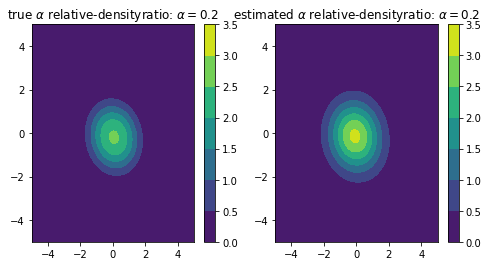

In [5]:
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
data = np.c_[X.ravel(),Y.ravel()]
x1_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[0],s[0])
x2_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[1],s[1])
Z_true = x1_pdf(data)/(0.2*x1_pdf(data)+0.8*x2_pdf(data))

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
levels=np.arange(0,4,0.5)
ax1.set_title(r'true $\alpha$ relative-densityratio: $\alpha=0.2$')
ax2.set_title(r'estimated $\alpha$ relative-densityratio: $\alpha=0.2$')
a = ax1.contourf(X,Y,Z_true.reshape(100,100),levels=levels)
b = ax2.contourf(X,Y,dens(np.c_[X.ravel(),Y.ravel()]).reshape(100,100),levels=levels)
fig.colorbar(a, ax=ax1)
fig.colorbar(b, ax=ax2)
fig.savefig('pic/QS2_ratio.png')

To get the parameters used for the density ratio calculation, call the following method.

In [7]:
print('lambda=',dens.lambda_)
print('sigma=',dens.sigma)
print('alpha=',dens.alpha)
print('kernel_num=',dens.N_kernels)
print('kernel_centers',dens.kernel_centers)
print('KLDiv=',dens.KLDiv)

lambda= 0.02
sigma= 1.0
alpha= 0.2
kernel_num= 200
kernel_centers [[-0.76409711 -0.16691068]
 [ 0.36195217  1.97506645]
 [ 0.6550289  -1.25874051]
 [ 0.81502915  0.26320875]
 [-0.51439503  0.89995192]
 [ 0.24234416  0.61704271]
 [ 0.92678704 -1.24208271]
 [ 1.01392142 -0.66178795]
 [ 0.66381705  1.43187072]
 [-0.22794541 -0.47076746]
 [ 0.29875937  1.57144009]
 [ 0.76606878  0.14463969]
 [ 0.07634653  0.13561294]
 [-0.92492118 -0.79263508]
 [-0.39391996  0.51812062]
 [ 0.15989547 -0.08194005]
 [-2.34594628  0.63305826]
 [-2.20097235 -0.15345114]
 [-1.31933517  0.827941  ]
 [-0.15047849 -0.94734699]
 [-0.42618019  0.036958  ]
 [-1.4071808  -0.78712821]
 [ 0.9439793   0.16137395]
 [-0.51787632 -0.59705522]
 [-0.72404118 -0.88339714]
 [ 0.73836695 -1.37327024]
 [-0.01831784  0.20442047]
 [-0.63660792 -1.3442197 ]
 [ 1.66746891  0.73540137]
 [-0.58541779  1.15489876]
 [-0.54382389  1.01693345]
 [-0.61582558 -0.03658363]
 [ 0.20087163 -0.93203658]
 [ 0.83343378 -0.17358232]
 [ 0.65310901  1